In [17]:
import pandas as pd

import re
import string

from textblob import TextBlob

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)})
%matplotlib inline

In [11]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('htm_comments_scrap.csv')
df.head()

,Subject,From,Affiliation,Date,Comment
0,S7-08-20,NaN,NaN,"Jul. 16, 2020",\nNo. This proposal is a cheat rule aimed at k...
1,S7-08-20,NaN,NaN,"Feb. 2, 2021",\nI am AGAINST the proposed change of reportin...
2,File No. S7-08-20,Binoy Biju,Parking Lot Attendant (HEB),"August 11, 2021",I am just a normal citizen making under 15 dol...
3,File No. S7-08-20,Varun Yadagiri,NaN,"March 27, 2021",Please do not implement this rule as I am oppo...
4,929x Dodd-Frank From,NaN,NaN,"Feb. 02, 2021",


In [3]:
df.shape

(1787, 5)

In [4]:
df.dtypes

Subject        object
From           object
Affiliation    object
Date           object
Comment        object
dtype: object

In [5]:
df.isna().sum()

Subject           2
From            223
Affiliation    1290
Date              2
Comment           0
dtype: int64

### Cleaning text data

In [13]:
def clean_text(text ): 
    delete_dict = {sp_character: '' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    #print('cleaned:'+text1)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr if ( not w.isdigit() and  ( not w.isdigit() and len(w)>3))]) 
    
    return text2.lower()

In [14]:
df['clean_comments'] = df['Comment'].apply(clean_text)

In [16]:
df['clean_comments'].head()

0    this proposal cheat rule aimed killing rise at...
1    against proposed change reporting chartered ma...
2    just normal citizen making under dollars hour ...
3                   please implement this rule opposed
4                                                     
Name: clean_comments, dtype: object

## Use textblob

In [20]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

df['polarity_score']=df['clean_comments'].\
   apply(lambda x : polarity(x))
df['polarity_score'].head()

0    0.150000
1    0.040476
2    0.149893
3    0.000000
4    0.000000
Name: polarity_score, dtype: float64

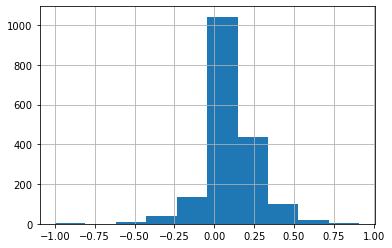

In [23]:
df['polarity_score'].hist();

In [42]:
def sentiment(x):
    if x <= 0:
        return 'proposed'
    else:
        return 'oppose'
    
df['polarity']=df['polarity_score'].\
   map(lambda x: sentiment(x))

## number of those who oppose vs those who Proposed

In [26]:
df['polarity'].value_counts()

oppose      937
proposed    850
Name: polarity, dtype: int64

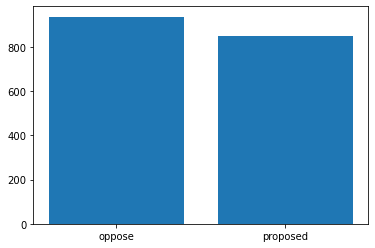

In [27]:
plt.bar(df.polarity.value_counts().index,
        df.polarity.value_counts())
plt.show()

### Descriptive analytics of the length of each comment letter

In [6]:
df['text_length'] = df['Comment'].str.len()

In [8]:
df['text_length'].describe()

count     1787.000000
mean       303.160045
std        725.564298
min          1.000000
25%         57.000000
50%        194.000000
75%        334.000000
max      26041.000000
Name: text_length, dtype: float64

In [30]:
def find_number(text):
    num = re.findall(r'[0-9]+',text)
    return " ".join(num)

df['number']=df['Comment'].apply(lambda x: find_number(x))

In [32]:
df['number'].head()

0                 
1    13 929 929 15
2     15 13 13 3 5
3                 
4                 
Name: number, dtype: object

In [59]:
df['clean_comments'][10]

'retail investorspeculator plead that withhold passing this rule harms individuals including main street investors have much information through this regulation would strip more public information available give funds investors more advantages cannot stress impairing this although this hands implore consider messages many others will harmed this bill passed please protect publics interest ensure that least have change against firms their algorithms machine learning technical experts'

In [ ]:
states = ['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
           'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
           'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
           'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
           'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']



In [ ]:
df[]

### Prepare data visualizations of the results

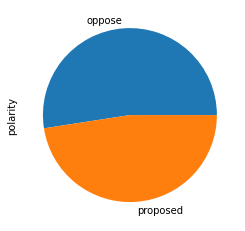

In [46]:
#pie chart
polarity_counts = df['polarity'].value_counts()
polarity_counts.plot(kind='pie')
plt.show()

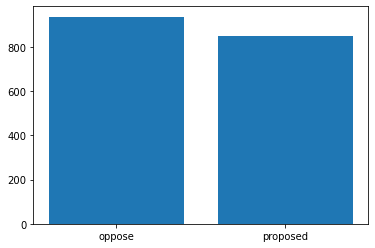

In [44]:
#Barcharts
plt.bar(df.polarity.value_counts().index,
        df.polarity.value_counts())
plt.show()

In [48]:
df['Date'][0]

'Jul. 16, 2020'

### Time series based on date of submission

In [49]:
df['date'] = pd.to_datetime(df['Date'])

In [51]:
df['date'].head()

0   2020-07-16
1   2021-02-02
2   2021-08-11
3   2021-03-27
4   2021-02-02
Name: date, dtype: datetime64[ns]

In [52]:
sorted_df = df.sort_values(by=['date'])
sorted_df.head()

,Subject,From,Affiliation,Date,Comment,text_length,clean_comments,polarity_score,polarity,number,date
0,S7-08-20,NaN,NaN,"Jul. 16, 2020",\nNo. This proposal is a cheat rule aimed at k...,269,this proposal cheat rule aimed killing rise at...,0.150000,oppose,,2020-07-16
984,Penny stock disclosure From,NaN,NaN,"Jul. 16, 2020",,1,,0.000000,proposed,,2020-07-16
985,File No. S7-08-20,Tim m Siegmund,NaN,"July 16, 2020",Please don't allow this rule that benefits the...,401,please dont allow this rule that benefits rich...,0.300000,oppose,,2020-07-16
986,File No. S7-08-20,Mark Makar,NaN,"July 16, 2020",This will cause transparency issues for retail...,102,this will cause transparency issues retail inv...,0.000000,proposed,,2020-07-16
987,File No. S7-08-20,Gene Dolgin,NaN,"July 16, 2020","As a retail investor, I believe it is extremel...",480,retail investor believe extremely important fi...,0.190312,oppose,13,2020-07-16


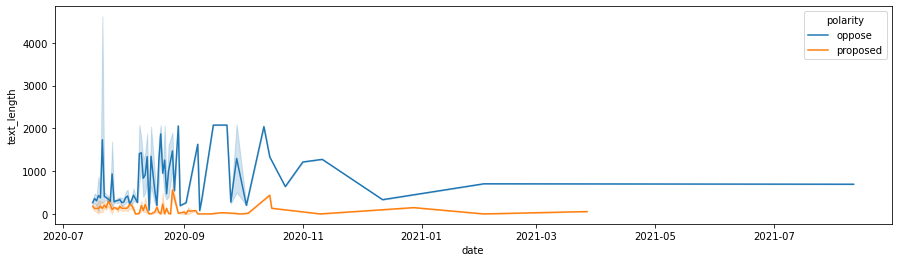

In [58]:
plt.figure(figsize = (15,4))
sns.lineplot(x='date', y='text_length', hue='polarity', data=sorted_df)
plt.show()